In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../csv_files/btc_mxn_bitso_19_12_14.csv')

In [3]:
df.set_index('date', inplace=True)

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 2019-01-01 to 2019-12-14
Data columns (total 6 columns):
24h_avg    348 non-null float64
12h_avg    348 non-null float64
min        348 non-null float64
max        348 non-null float64
volume     348 non-null float64
m_side     348 non-null object
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [6]:
df_dum = pd.get_dummies(df)

In [7]:
df_dum.rename(columns={'m_side_buy':'buy', 'm_side_sell':'sell'}, inplace=True)

In [8]:
df_dum

,24h_avg,12h_avg,min,max,volume,buy,sell
date,,,,,,,
2019-01-01,72367.013703,71940.650982,71482.60,74305.00,23.596065,0,1
2019-01-02,74240.741398,73729.642422,73200.00,75800.00,32.171027,0,1
2019-01-03,74502.944671,75087.876912,73206.01,75770.91,32.681422,0,1
2019-01-04,73862.854180,74143.966128,73111.00,74992.99,63.488756,1,0
2019-01-05,74501.196250,74502.782839,73500.00,75340.12,43.711783,1,0
...,...,...,...,...,...,...,...
2019-12-10,140312.664853,141920.500901,138009.72,142536.45,42.952229,0,1
2019-12-11,137608.144227,139283.050570,132000.00,139900.00,35.334826,1,0
2019-12-12,136844.432405,136662.505259,135250.41,138699.98,25.641359,0,1


# Checking stationarity

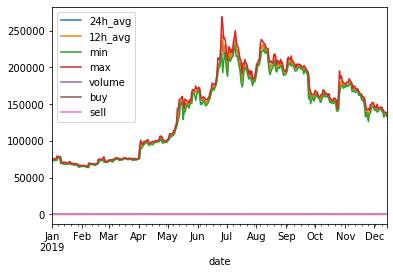

In [9]:
#checking stationarity
#Visual proof
df_dum.plot();

In [10]:
#Dicky fuller test
from statsmodels.tsa.stattools import adfuller

In [11]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [12]:
adf_test(df_dum['24h_avg'])
'''
As we see with the visual proof
the 24h_avg column is not stationary
the test statistic is greater than our critical value.
'''

Results of Dickey-Fuller Test:
Test Statistic                  -1.450065
p-value                          0.558053
#Lags Used                       3.000000
Number of Observations Used    344.000000
Critical Value (1%)             -3.449503
Critical Value (5%)             -2.869979
Critical Value (10%)            -2.571266
dtype: float64


'\nAs we see with the visual proof\nthe 24h_avg column is not stationary\nthe test statistic is greater than our critical value.\n'

In [13]:
adf_test(df_dum['12h_avg'])
'''
As we see with the visual proof
the 12h_avg column is not stationary
the test statistic is greater than our critical value.
'''

Results of Dickey-Fuller Test:
Test Statistic                  -1.418821
p-value                          0.573220
#Lags Used                       5.000000
Number of Observations Used    342.000000
Critical Value (1%)             -3.449616
Critical Value (5%)             -2.870028
Critical Value (10%)            -2.571292
dtype: float64


'\nAs we see with the visual proof\nthe 12h_avg column is not stationary\nthe test statistic is greater than our critical value.\n'

In [14]:
adf_test(df_dum['min'])
'''
As we see with the visual proof
the min column is not stationary
the test statistic is greater than our critical value.
'''

Results of Dickey-Fuller Test:
Test Statistic                  -1.410193
p-value                          0.577380
#Lags Used                       2.000000
Number of Observations Used    345.000000
Critical Value (1%)             -3.449447
Critical Value (5%)             -2.869954
Critical Value (10%)            -2.571253
dtype: float64


'\nAs we see with the visual proof\nthe min column is not stationary\nthe test statistic is greater than our critical value.\n'

In [15]:
adf_test(df_dum['max'])
'''
As we see with the visual proof
the max column is not stationary
the test statistic is greater than our critical value.
'''

Results of Dickey-Fuller Test:
Test Statistic                  -1.471165
p-value                          0.547725
#Lags Used                       1.000000
Number of Observations Used    346.000000
Critical Value (1%)             -3.449392
Critical Value (5%)             -2.869930
Critical Value (10%)            -2.571240
dtype: float64


'\nAs we see with the visual proof\nthe max column is not stationary\nthe test statistic is greater than our critical value.\n'

In [16]:
df

,24h_avg,12h_avg,min,max,volume,m_side
date,,,,,,
2019-01-01,72367.013703,71940.650982,71482.60,74305.00,23.596065,sell
2019-01-02,74240.741398,73729.642422,73200.00,75800.00,32.171027,sell
2019-01-03,74502.944671,75087.876912,73206.01,75770.91,32.681422,sell
2019-01-04,73862.854180,74143.966128,73111.00,74992.99,63.488756,buy
2019-01-05,74501.196250,74502.782839,73500.00,75340.12,43.711783,buy
...,...,...,...,...,...,...
2019-12-10,140312.664853,141920.500901,138009.72,142536.45,42.952229,sell
2019-12-11,137608.144227,139283.050570,132000.00,139900.00,35.334826,buy
2019-12-12,136844.432405,136662.505259,135250.41,138699.98,25.641359,sell


In [17]:
df_dum.reset_index(drop=False, inplace=True)

In [18]:
df_dum

,date,24h_avg,12h_avg,min,max,volume,buy,sell
0,2019-01-01,72367.013703,71940.650982,71482.60,74305.00,23.596065,0,1
1,2019-01-02,74240.741398,73729.642422,73200.00,75800.00,32.171027,0,1
2,2019-01-03,74502.944671,75087.876912,73206.01,75770.91,32.681422,0,1
3,2019-01-04,73862.854180,74143.966128,73111.00,74992.99,63.488756,1,0
4,2019-01-05,74501.196250,74502.782839,73500.00,75340.12,43.711783,1,0
...,...,...,...,...,...,...,...,...
343,2019-12-10,140312.664853,141920.500901,138009.72,142536.45,42.952229,0,1
344,2019-12-11,137608.144227,139283.050570,132000.00,139900.00,35.334826,1,0
345,2019-12-12,136844.432405,136662.505259,135250.41,138699.98,25.641359,0,1
346,2019-12-13,137767.075557,137186.985455,136800.01,138799.97,39.382959,0,1


In [19]:
def stationary(df):
    df['24h_avg_log'] = np.log(df['24h_avg'])
    df['24h_avg_log_diff'] = df['24h_avg_log'] - df['24h_avg_log'].shift(1)
    df['12h_avg_log'] = np.log(df['12h_avg'])
    df['12h_avg_log_diff'] = df['24h_avg_log'] - df['24h_avg_log'].shift(1)
    df['min_log'] = np.log(df['min'])
    df['min_log_diff'] = df['24h_avg_log'] - df['24h_avg_log'].shift(1)
    return df

In [20]:
#stationary(df_dum)